# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** 
# Bhavya Lahari Bommireddy
# 11514032


In [13]:
# Get the datasets
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat 
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0   113k      0 --:--:-- --:--:-- --:--:--  114k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0  22935      0 --:--:-- --:--:-- --:--:-- 23700


In [14]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [15]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data

# instances_tr = read_data("train.dat")
# print(instances_tr)
def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    # We can calculate dot product using numoy library as well.
    #np.dot(array1,array2)   
    #Calculating dot product without using numpy.
    return sum(x*y for x, y in zip(array1, array2))

def sigmoid(x):
    #Using inbuilt exponential function to calculate the exponent value.
    sig = 1 / (1 + math.exp(-x))
    return sig

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #Calling the function dot product defined above.
    return sigmoid(dot_product(weight,instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    if output(weights,instance)>=0.5:
        return 1
    else:
        return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Initializing the weights vector so that the training of the perceptron can begin.
    weights = [0] * (len(instances[0]))

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Calculating the dot product of weights in input in each epoch.
            in_value = dot_product(weights, instance)
            #The signmoid of the dot product will give the predicted output.
            output = sigmoid(in_value)
            # Calculate the error of each predicted output by calculating the difference between given output and predicted output.
            error = instance[-1] - output
            #TODO: name these steps
            #Updating the weights according to the gradient. We update using negative of the gradient of error.
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

[[-1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], [-1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], [-1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], [-1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], [-1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [-1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1], [-1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [-1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0], [-1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [-1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], [-1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [-1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0], [-1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1], [-1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], [-1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], [-1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], [-1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], [-1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], [-1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], [-1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], [-1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1

## Run it

In [16]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




# We could use the predict(weight,instance) function in place of using the dotproduct(weights,intance) and sigmoid(in_value) functions. The result is the same in both the ways.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [8]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
sum1=0
for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      sum1=sum1+1
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
        

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



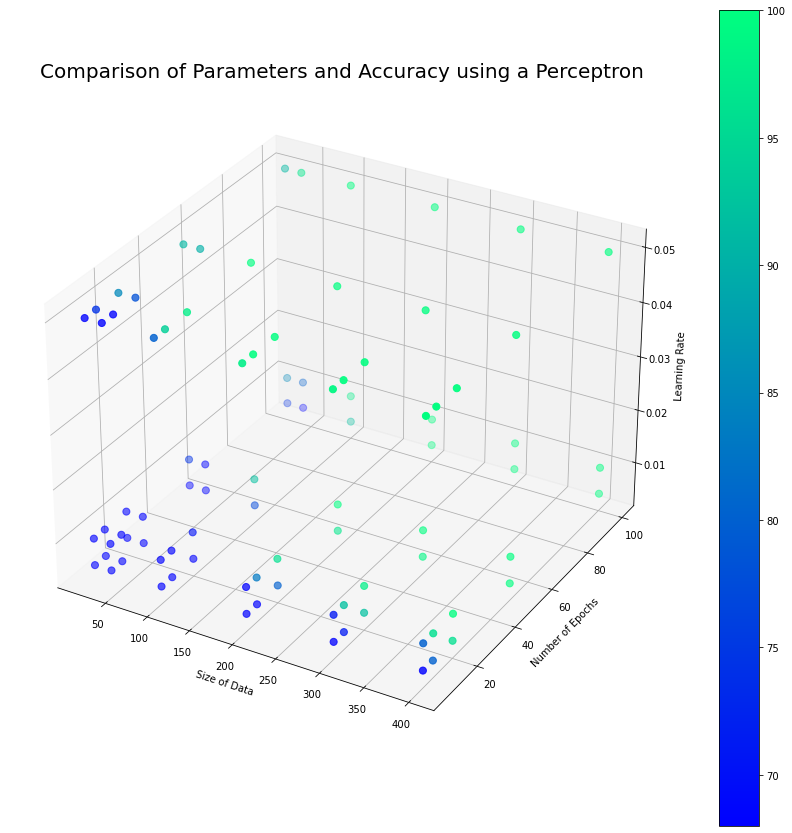

In [12]:
import matplotlib.pyplot as plt
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

percent=[]
nepochs=[]
learningrates=[]
acc=[]
for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      percent.append(size)
      nepochs.append(epochs)
      learningrates.append(lr)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      acc.append(accuracy)
      
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(projection='3d')
plt.title("Comparison of Parameters and Accuracy using a Perceptron",fontsize=20)
plt.xlabel("Size of Data")
plt.ylabel("Number of Epochs")
ax.set_zlabel("Learning Rate")
img=ax.scatter(percent,nepochs,learningrates,c=acc,cmap='winter',s=50)
fig.colorbar(img)
plt.show()

# The Result of the training
A general trend observed in the training is that as the number of epochs increase, the accuracy of the training increase, irrespective of the learning rate and the size of input. There is an exception to this observation at training data set size of 40 data points and learning rate at 0.005. In this case the accurary is not changing with the increase in number of epochs.
We can see that the lowest number of epochs used for traning produces lowest accurary results. This is because neural network training is an iterative process. It is neccessarry to improvise the weights so that the neural network can produce higher accuracy. If the number of epochs are less there can be underfitting, if the epochs increase more there is a chance of overfitting. Overfitting leads to the model being biased towards to input data set.

Another observations from the data is that as the learning rate decreases and the batch size increses, the accuracy is increasing. This is because as the learning rate decreases, the number of epochs increase, therefore the accuracy increases as the neural network can learn better.There is another significant observation. We can see that even if the learning rate is less, number of epochs is more, if the traning data size is less, we obtain less accuracy.We can see some blue dots the corresponding regions.

The graph above depicts the results. The color of the dots represents accuracy. The blue dots are lower accuracy and the green dots have high accuracy. We get the best accuracy in the dataset when the number of epochs is high, learning rate is low and size of data is large. We can see from the graph, the highest number of green dots are distributed in the region where learning rate is low, number of epochs is high and size of data is large. It is clear in the graph that the accuracy is least when the number of epochs is low.This is a region where maximum number of blue dots are concentrated.



# A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?

From the results obtained from our dataset, we can see that it is not necessary for training with all the training dataset to get highest accuracy. Let have a looks at following cases:
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 100.0
#tr: 200, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 100.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 100.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 100.0

We can see that the entire dataset is not used for training. With low learning rate and high number of epochs higher accuracies can be obtained. 

# B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
###  tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
### tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

The first case can be the case of overfitting. Overfitting has reduced in the second case due to the increase in size of training dataset. In the first case, the model is having higher accuracy because the neural network is trained to predict results according to the input data. If new dataset comes in, the predictions would not be very accurate.

# C. Can you get higher accuracy with additional hyperparameters (higher than 80.0)?
We can use dropout method to reduce overfitting and increase accuracy.
We can split the data set into batches to increase the accuracy. Mini batch size is the number of sub samples given to the network after which parameter update happens.
Momentum is an additional hyperparameters which helps to know the direction of the next step with the knowledge of the previous steps. It helps to prevent oscillations. It will increase accuracy.

# D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
We have to consider validation test accuracy to check the number of epochs. If the training accuracy is increasing but the validation data accuracy is decreasing, this is a point where the model is overfitting the data. So we should keep a check on the comparison between training dataset accuracy and testing dataset accuracy so that we can stop increasing the number of wpochs beyond limit which could cause overfitting.